In [4]:
##Importing the libraries

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.7.0'

In [6]:
##Loading the Images

In [63]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

In [99]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Severe Tropical Storm_SS/Screenshot 2022-01-31 at 10.11.46 PM.png')

In [100]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Depression_D/TD-Dec11-5.30-D-2012.png')

In [101]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Storm_S/TS-Dec17-S-2013.png')



In [102]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Typhoon_T/Screenshot 2021-12-22 at 8.15.23 PM.png')

In [103]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

In [104]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(64,64),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [105]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [106]:
train_dataset.class_indices

{'Severe Tropical Storm_SS': 0,
 'Tropical Depression_D': 1,
 'Tropical Storm_S': 2,
 'Typhoon_T': 3}

In [107]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [110]:
test_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(64,64),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


In [19]:
##BUILDING AND TRAINING THE neural NETWORK

In [20]:
#num of inputs+num out put/2
(1152+4)/2

578.0

In [111]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Flatten())

#classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)        

In [112]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
hist=classifier.fit_generator(train_dataset,epochs=60,validation_data=train_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/60
5/5 [==============================] - 66s 13s/step - loss: 1.4252 - accuracy: 0.2250 - val_loss: 1.3803 - val_accuracy: 0.3625
Epoch 2/60
5/5 [==============================] - 14s 3s/step - loss: 1.3787 - accuracy: 0.3125 - val_loss: 1.3674 - val_accuracy: 0.4000
Epoch 3/60
5/5 [==============================] - 12s 3s/step - loss: 1.3726 - accuracy: 0.2625 - val_loss: 1.3422 - val_accuracy: 0.4375
Epoch 4/60
5/5 [==============================] - 12s 3s/step - loss: 1.3319 - accuracy: 0.3562 - val_loss: 1.2886 - val_accuracy: 0.4750
Epoch 5/60
5/5 [==============================] - 12s 3s/step - loss: 1.2774 - accuracy: 0.4688 - val_loss: 1.2118 - val_accuracy: 0.5125
Epoch 6/60
5/5 [==============================] - 12s 3s/step - loss: 1.1890 - accuracy: 0.5250 - val_loss: 1.1109 - val_accuracy: 0.5813
Epoch 7/60
5/5 [==============================] - 12s 3s/step - loss: 1.0530 - accuracy: 0.5813 - val_loss: 1.0835 - val_accuracy: 0.5312
Epoch 8/60
5/5 [=================

In [24]:
#120=45

In [114]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)        

In [115]:
test_dataset.class_indices

{'Severe Tropical Storm_20': 0,
 'Tropical Storm_S': 1,
 'Tropical_Depression_D': 2,
 'Typhoon_T': 3}

In [116]:
predictions=classifier.predict(test_dataset)
predictions

array([[9.39649165e-01, 1.26641523e-02, 4.73225266e-02, 3.64214357e-04],
       [9.07136798e-01, 9.27947313e-02, 5.72888857e-05, 1.11848249e-05],
       [2.96608835e-01, 2.05863521e-01, 4.96533334e-01, 9.94238770e-04],
       [9.89277005e-01, 9.98277590e-03, 6.20617415e-04, 1.19604483e-04],
       [3.91586141e-08, 9.92834687e-01, 7.16531556e-03, 2.28200930e-10],
       [8.73260736e-01, 9.61602554e-02, 3.05762403e-02, 2.72031662e-06],
       [2.98123360e-01, 6.90843821e-01, 1.10312849e-02, 1.47296237e-06],
       [9.58497167e-01, 8.17856577e-04, 2.85094883e-03, 3.78339812e-02],
       [6.96186423e-01, 7.90861726e-04, 1.61483642e-02, 2.86874384e-01],
       [7.95016646e-01, 6.05623296e-04, 1.38763348e-02, 1.90501392e-01],
       [9.90955532e-01, 2.85569549e-04, 1.35433080e-03, 7.40462774e-03],
       [9.98244524e-01, 1.61986100e-04, 5.53978956e-04, 1.03960256e-03],
       [9.25222874e-01, 2.07519643e-02, 4.01708968e-02, 1.38542885e-02],
       [8.77746522e-01, 4.61150706e-03, 1.02168672e

In [117]:
predictions=np.argmax(predictions,axis=1)
predictions

array([0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 3, 3, 3, 3, 3,
       1, 3, 3, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 2])

In [118]:
test_dataset.class_indices

{'Severe Tropical Storm_20': 0,
 'Tropical Storm_S': 1,
 'Tropical_Depression_D': 2,
 'Typhoon_T': 3}

In [119]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.525

In [121]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63        20
           1       0.39      0.45      0.42        20
           2       0.36      0.25      0.29        20
           3       1.00      0.60      0.75        20

    accuracy                           0.53        80
   macro avg       0.57      0.53      0.52        80
weighted avg       0.57      0.53      0.52        80



In [123]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss ',fontsize=12)

Text(0, 0.5, 'Train and test loss ')

Text(0, 0.5, 'Train and test accuracy')

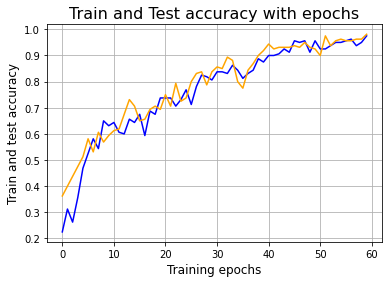

In [124]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)

In [125]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
#plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [37]:
##classifying one single image

In [177]:
image=cv2.imread('/content/gdrive/MyDrive/Sunik_sample_data/train_data_1/Tropical_Depression_D/Screenshot 2021-12-20 at 6.34.22 PM.png')

In [178]:
cv2_imshow(image)

In [179]:
image.shape

(572, 820, 3)

In [180]:
#image

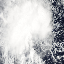

In [181]:
#reshape image
image=cv2.resize(image,(64,64))
cv2_imshow(image)

In [182]:
image

array([[[193, 191, 190],
        [182, 179, 179],
        [167, 163, 162],
        ...,
        [160, 158, 155],
        [163, 161, 160],
        [208, 205, 202]],

       [[170, 166, 165],
        [178, 175, 174],
        [180, 176, 175],
        ...,
        [145, 144, 141],
        [143, 139, 138],
        [159, 159, 155]],

       [[165, 156, 156],
        [174, 170, 169],
        [176, 172, 171],
        ...,
        [162, 158, 156],
        [168, 164, 163],
        [209, 213, 212]],

       ...,

       [[125, 120, 116],
        [110, 103, 100],
        [124, 117, 114],
        ...,
        [ 64,  47,  41],
        [ 42,  24,  20],
        [ 40,  22,  20]],

       [[110,  99,  96],
        [128, 121, 116],
        [165, 161, 157],
        ...,
        [ 84,  73,  69],
        [ 55,  37,  33],
        [ 38,  20,  16]],

       [[106,  92,  90],
        [ 92,  77,  73],
        [105,  96,  92],
        ...,
        [115, 104, 101],
        [ 48,  31,  27],
        [ 39,  24,  19]]

In [183]:
image=image/255

In [184]:
image

array([[[0.75686275, 0.74901961, 0.74509804],
        [0.71372549, 0.70196078, 0.70196078],
        [0.65490196, 0.63921569, 0.63529412],
        ...,
        [0.62745098, 0.61960784, 0.60784314],
        [0.63921569, 0.63137255, 0.62745098],
        [0.81568627, 0.80392157, 0.79215686]],

       [[0.66666667, 0.65098039, 0.64705882],
        [0.69803922, 0.68627451, 0.68235294],
        [0.70588235, 0.69019608, 0.68627451],
        ...,
        [0.56862745, 0.56470588, 0.55294118],
        [0.56078431, 0.54509804, 0.54117647],
        [0.62352941, 0.62352941, 0.60784314]],

       [[0.64705882, 0.61176471, 0.61176471],
        [0.68235294, 0.66666667, 0.6627451 ],
        [0.69019608, 0.6745098 , 0.67058824],
        ...,
        [0.63529412, 0.61960784, 0.61176471],
        [0.65882353, 0.64313725, 0.63921569],
        [0.81960784, 0.83529412, 0.83137255]],

       ...,

       [[0.49019608, 0.47058824, 0.45490196],
        [0.43137255, 0.40392157, 0.39215686],
        [0.48627451, 0

In [185]:
image.shape

(64, 64, 3)

In [186]:
image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [187]:
result =classifier.predict(image)
result


array([[9.9263072e-01, 1.7298616e-03, 5.5537359e-03, 8.5700201e-05]],
      dtype=float32)

In [188]:
result=np.argmax(result)
result

0

In [176]:
test_dataset.class_indices

{'Severe Tropical Storm_20': 0,
 'Tropical Storm_S': 1,
 'Tropical_Depression_D': 2,
 'Typhoon_T': 3}

In [51]:
##the prediction is able to classify -Typhoon only